In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/customer-shopping-trends-dataset")

print("Path to dataset files:", path)

100%|██████████| 146k/146k [00:00<00:00, 641kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file name
file_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2/your_file.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2/your_file.csv'

In [ ]:
import os

directory_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2"
files = os.listdir(directory_path)
print("Files in directory:", files)


Files in directory: ['shopping_trends.csv', 'shopping_trends_updated.csv']


In [ ]:
import pandas as pd

# File path
file_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/versions/2/shopping_trends.csv"

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
print(data.isnull().sum())


Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [ ]:
print(data.describe())


       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


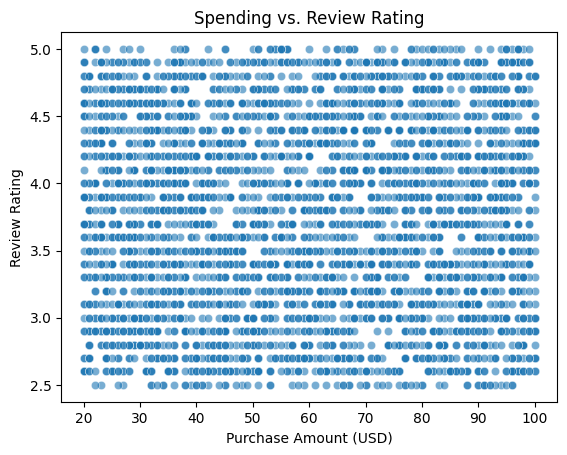

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Purchase Amount vs. Review Rating
sns.scatterplot(x='Purchase Amount (USD)', y='Review Rating', data=data, alpha=0.6)
plt.title('Spending vs. Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()


Step 3: Group Spending by Age Groups
Divide customers into Age Groups:

Split the customers into categories like:

18–30 years (younger group),

31–50 years (middle-aged group),

51–70 years (older group).

Calculate Average Spending for Each Group:

Find the average purchase amount (Purchase Amount (USD)) for each age group to see which group spends the most.

Visualize the Findings:

Use a bar chart to show average spending across the different age groups.

<ipython-input-16-f4865d44aeef>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = data.groupby('Age Group')['Purchase Amount (USD)'].mean()


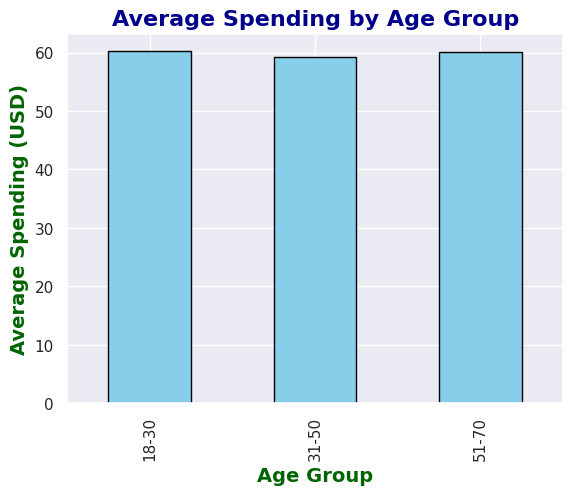

In [ ]:
# Create age groups
bins = [18, 30, 50, 70]
labels = ['18-30', '31-50', '51-70']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate average spending by age group
age_spending = data.groupby('Age Group')['Purchase Amount (USD)'].mean()

# Bar plot to visualize spending trends
age_spending.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize plot without triggering font-related warnings
plt.title('Average Spending by Age Group', fontsize=16, fontweight='bold', color='darkblue')  # No explicit font family
plt.xlabel('Age Group', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Average Spending (USD)', fontsize=14, fontweight='bold', color='darkgreen')

# Display the plot
plt.show()


Step 4: Analyze Preferred Payment Methods
Identify the Popular Payment Methods:

Count the occurrences of each payment method in the dataset (e.g., Credit Card, PayPal, Cash, etc.) to find out which is most preferred.

Visualize the Preferences:

Create a pie chart to show the proportions of each payment method, giving a clear and appealing visual summary.

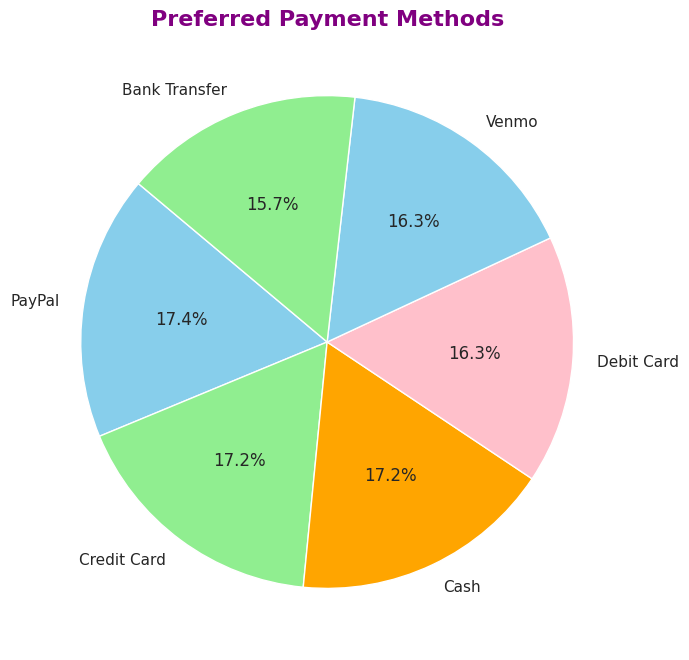

In [ ]:
# Count preferred payment methods
payment_counts = data['Preferred Payment Method'].value_counts()

# Pie chart to visualize preferences
plt.figure(figsize=(8, 8))  # Adjust size of the chart
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'pink'])

# Customizing title and removing font-related settings
plt.title('Preferred Payment Methods', fontsize=16, fontweight='bold', color='purple')  # No explicit font family
plt.ylabel('')  # Empty label to avoid clutter
plt.show()


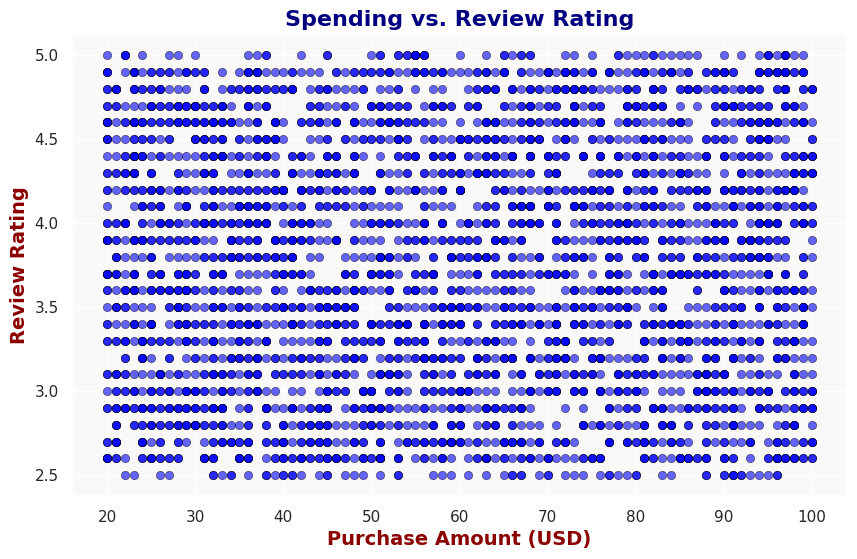

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style
sns.set_theme(style="darkgrid")  # You can use other styles like 'whitegrid', 'ticks', etc.

# Scatter plot for Purchase Amount vs. Review Rating with customizations
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.scatterplot(
    x='Purchase Amount (USD)',
    y='Review Rating',
    data=data,
    alpha=0.6,
    color="blue",
    edgecolor="black"
)

# Customize background color and text style
plt.gca().set_facecolor("#f9f9f9")  # Light background color for the plot area
plt.title("Spending vs. Review Rating", fontsize=16, fontweight='bold', color="navy")
plt.xlabel("Purchase Amount (USD)", fontsize=14, fontweight='bold', color="darkred")
plt.ylabel("Review Rating", fontsize=14, fontweight='bold', color="darkred")

# Show the plot
plt.show()


Project: Customer Shopping Trends Analysis
project focused on analyzing customer behavior using the dataset and visualizing trends in spending, review ratings, age groups, and payment preferences.

Step 1: Data Loading & Exploration
You successfully loaded the dataset into Python using pandas.

Explored the data structure, missing values, and key statistics, confirming the dataset was clean.

Step 2: Spending vs. Review Ratings Analysis
Created a scatter plot showing the relationship between purchase amount and review ratings.

Insights: Observed whether higher spending led to better reviews or if there was no clear correlation.

Step 3: Spending by Age Groups
Grouped customers into 3 age ranges: 18-30, 31-50, 51-70 years.

Calculated average spending for each group and visualized it with a bar chart.

Insights: Identified which age group spends the most.

Step 4: Preferred Payment Methods
Counted the payment methods used by customers (Credit Card, PayPal, Cash, etc.).

Visualized the payment preferences with a pie chart.

Insights: Determined which payment method is most popular among customers.

Step 5: Final Report & Business Recommendations
Summarized findings: Patterns in spending, review ratings, age-based purchases, and payment choices.

Suggested business strategies:

Focus marketing efforts on high-spending age groups.

Improve customer incentives for popular payment methods.

Enhance customer satisfaction based on spending trends.
